# Importing Libraries

In [10]:
# !pip install emoji
# !pip install pyarabic
# !pip install tashaphyne
# !pip install arabic_reshaper
# !pip install bidi
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

ERROR: Could not find a version that satisfies the requirement bidi (from versions: none)
ERROR: No matching distribution found for bidi
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import emoji
import pickle
import seaborn as sns
import os
import numpy as np
import joblib
import arabic_reshaper
from bidi.algorithm import get_display

import warnings
warnings.filterwarnings('ignore')

from textblob import TextBlob
import pickle
import pyarabic.araby as araby
import tashaphyne.arabic_const as arabconst
from tashaphyne.stemming import ArabicLightStemmer

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.isri import ISRIStemmer
from nltk.tokenize import TweetTokenizer

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Loading and Discovering the Dataset

In [2]:
url = 'https://raw.githubusercontent.com/Hala-Mulki/L-HSAB-First-Arabic-Levantine-HateSpeech-Dataset/master/Dataset/L-HSAB'
data = pd.read_csv(url, sep='\t')

In [3]:
data.head(10)

,Tweet,Class
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد...,abusive
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه...,normal
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف...,normal
3,وليد جنبلاط كاتب الحكمة يا قذر,abusive
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشك...,abusive
5,يا جبران باسيل يا معلم يا ريس يا استاذ بدك حضن...,normal
6,ما سمعنا جعاركم مبارح على القصف الإسرائيلي يلي...,hate
7,نصيحة احكي مع الرئيس ميشال عون او هاجم جبران ب...,normal
8,صافي يا بقر,abusive
9,لا تعتب عليه هيدا اسمه ابو صرماي,abusive


In [4]:
data.shape

(5846, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   5846 non-null   object
 1   Class   5846 non-null   object
dtypes: object(2)
memory usage: 91.5+ KB


In [6]:
np.unique(data['Class'])

array(['abusive', 'hate', 'normal'], dtype=object)

# Exploratory Data Analysis

### Number of Tweets per Class

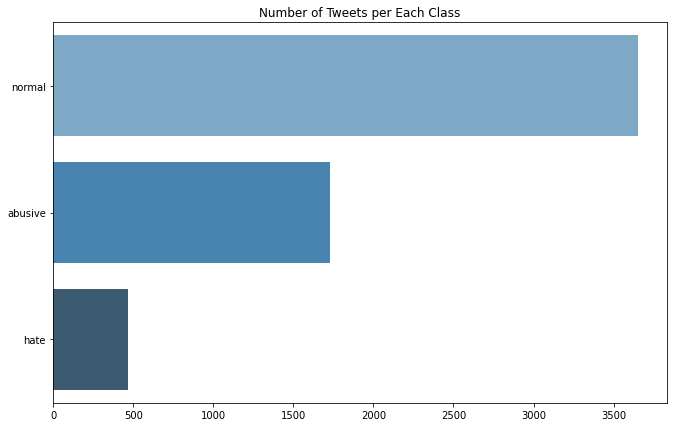

In [11]:
plt.figure(figsize=(11,7))

ax = sns.countplot(y=data['Class'], data=data, palette="Blues_d", order = data['Class'].value_counts().index)

plt.xlabel('')
plt.ylabel('')
plt.title('Number of Tweets per Each Class')

plt.show()

### Word Cloud for the Most Frequent Words

In [8]:
texts = data['Tweet']
texts = [comment.split(" ") for comment in texts]
texts = [' '.join(comment) for comment in texts]
texts = ' '.join(texts)

reshaped_text = arabic_reshaper.reshape(texts)
bidi_text = get_display(reshaped_text)

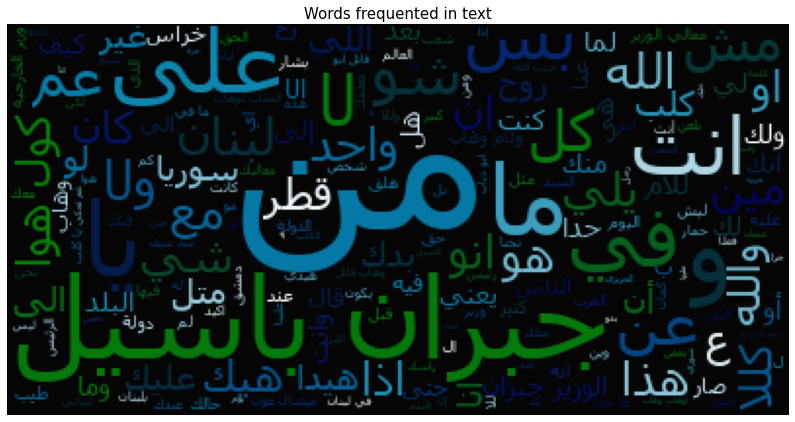

In [27]:
wordcloud = WordCloud(font_path = 'tahoma.ttf',
                      background_color='black',
                      stopwords=(stops and stop_word_comp),
                      max_words=200, 
                      random_state=42).generate(bidi_text)

plt.figure(figsize=(14,10))
plt.axis("off")
plt.title("Words frequented in text", fontsize=15)
plt.imshow(wordcloud.recolor(colormap= 'ocean' , random_state=42), alpha=0.98)
plt.show()

### Top Unigrams after Removing Stop Words

In [22]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = stops and stop_word_comp).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(data['Tweet'], 20)

for word, freq in common_words:
    print(word, freq)

df1 = pd.DataFrame(common_words, columns = ['Tweet' , 'count'])

يا 1347
جبران 1080
باسيل 1078
انت 536
بس 384
شو 383
الله 353
عم 331
لبنان 277
مش 244
هوا 204
وهاب 204
كول 194
شي 188
قطر 179
الوزير 170
كلب 163
يلي 157
مين 156
هيك 144


### Top Bigrams after Removing Stop Words

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words = stops and stop_word_comp).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(data['Tweet'], 20)

for word, freq in common_words:
    print(word, freq)

df2 = pd.DataFrame(common_words, columns = ['Tweet' , 'count'])

جبران باسيل 954
كول هوا 166
الوزير جبران 86
وئام وهاب 61
معالي الوزير 54
وزير الخارجية 50
ميشال عون 48
ابو دياب 39
العقاب لوهاب 37
لوهاب وهاب 36
وهاب قاتل 36
قاتل ابو 36
حزب الله 36
عماد عثمان 35
عم تحكي 34
امير قطر 31
سعد الحريري 31
استاذ وئام 29
بلا شرف 27
وزير خارجية 26


### Top Trigrams after Removing Stop Words

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words = stops and stop_word_comp).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(data['Tweet'], 20)

for word, freq in common_words:
    print(word, freq)

df3 = pd.DataFrame(common_words, columns = ['Tweet' , 'count'])

الوزير جبران باسيل 88
العقاب لوهاب وهاب 36
لوهاب وهاب قاتل 36
وهاب قاتل ابو 36
قاتل ابو دياب 36
الخارجية جبران باسيل 25
وزير خارجية لبنان 21
الرئيس ميشال عون 19
وزير الخارجية جبران 18
يا جبران باسيل 17
التيار الوطني الحر 17
اللبناني جبران باسيل 16
الملك جبران باسيل 16
جبران باسيل بدو 15
وزير الخارجية اللبناني 15
الخارجية اللبناني جبران 15
كول هوا يا 14
يا استاذ وئام 14
يا معالي الوزير 14
يا بلا شرف 13


### Top Fivegrams after Removing Stop Words

In [24]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(5, 5), stop_words = stops and stop_word_comp).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(data['Tweet'], 20)

for word, freq in common_words:
    print(word, freq)

df3 = pd.DataFrame(common_words, columns = ['Tweet' , 'count'])

العقاب لوهاب وهاب قاتل ابو 36
لوهاب وهاب قاتل ابو دياب 36
وزير الخارجية اللبناني جبران باسيل 13
وزير خارجية لبنان جبران باسيل 11
جبران باسيل سيإنإن أمن إسرائيل 6
باسيل سيإنإن أمن إسرائيل حق 6
وزير الخارجية والمغتربين حكومة تصريف 6
الخارجية والمغتربين حكومة تصريف الاعمال 6
والمغتربين حكومة تصريف الاعمال جبران 6
حكومة تصريف الاعمال جبران باسيل 6
جبران باسيل مندوب مبيعات سوري 4
مقابلة جبران باسيل سيإنإن أمن 4
جبران باسيل وزير خارجية لبنان 4
نجحنا بقوتنا شكرا فخامة الرئيس 4
بقوتنا شكرا فخامة الرئيس ومعالي 4
شكرا فخامة الرئيس ومعالي الوزير 4
فخامة الرئيس ومعالي الوزير جبران 4
الرئيس ومعالي الوزير جبران باسيل 4
ارادت اسرائيل حفظ امنها وهذا 4
اسرائيل حفظ امنها وهذا حقها 4


# Pre-Cleaning Feature Extraction

In [17]:
# def avg_word(sentence):
#     words = sentence.split()
#     if len(words) == 0:
#         return 0
#     return (sum(len(word) for word in words)/len(words))

# def emoji_counter(sentence):
#     return emoji.emoji_count(sentence)

# data['word_count'] = data['Tweet'].apply(lambda x: len(str(x).split(" ")))
# data['char_count'] = data['Tweet'].str.len() ## this also includes spaces
# data['avg_char_per_word'] = data['Tweet'].apply(lambda x: avg_word(x))
# data['emoji_count'] = data['Tweet'].apply(lambda x: emoji_counter(x))

# data = data.sort_values(by='emoji_count',ascending=[0])
# data.head()

# Data Cleaning and Preprocessing

## Dropping Duplicate Rows

In [18]:
data.drop_duplicates(subset='Tweet', keep='first', inplace=True, ignore_index=False)

## Text Normalization

In [19]:
def normalizeArabic(text):
    
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", str(text))
    #text = re.sub("ى", "ي", text)
    #text = re.sub("ؤ", "ء", text)
    #text = re.sub("ئ", "ء", text)
    #text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    
    return araby.strip_tashkeel(text)

In [20]:
data['Tweet'] = data['Tweet'].apply(lambda x:normalizeArabic(x))
data.head()

,Tweet,Class
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد...,abusive
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه...,normal
2,و مصلحة لبنان تبدا باستخراج النفط و الغاز لوقف...,normal
3,وليد جنبلاط كاتب الحكمة يا قذر,abusive
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشكلك,abusive


## Removing Stop Words

In [10]:
stops = set(stopwords.words("arabic"))

stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك",
                  "أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم",
                  "أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى",
                  "إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه",
                  "إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة",
                  "ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى",
                  "التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين",
                  "اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه",
                  "انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع",
                  "بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد",
                  "بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه",
                  "تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب",
                  "حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات",
                  "ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح",
                  "رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا",
                  "شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام",
                  "عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن",
                  "عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما",
                  "فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا",
                  "كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف",
                  "كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي",
                  "لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا",
                  "لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام",
                  "ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك",
                  "مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية",
                  "نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا",
                  "هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه",
                  "هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت",
                  "وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}

In [22]:
def tokenize_text(text):
    tokens = word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stops and token not in stop_word_comp]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [23]:
data['Tweet'] = data['Tweet'].apply(lambda x:remove_stopwords(x))
data.head()

,Tweet,Class
0,الوزير جبران باسيل تاج راسك جربان ممنوع المساس...,abusive
1,صديقي انت ابن جامعه اللعبه اكبر داعش اللعبه سن...,normal
2,مصلحة لبنان تبدا باستخراج النفط الغاز لوقف الش...,normal
3,وليد جنبلاط كاتب الحكمة قذر,abusive
4,شو بتلبقلك كلمة خنزير بتجي مفصله قياسك وشكلك,abusive


## Stemming

In [24]:
# st = ISRIStemmer()

# def stem(text):
#   for token in word_tokenize(text):
#     text = ' '.join(st.stem(token))
#   return text

In [25]:
# ArListem = ArabicLightStemmer()

# def stem(text):
#     zen = TextBlob(text)
#     words = zen.words
#     cleaned = list()
#     for w in words:
#         ArListem.light_stem(w)
#         cleaned.append(ArListem.get_root())
#     return " ".join(cleaned)

In [26]:
# data['Tweet'] = data['Tweet'].apply(lambda x:stem(x))
# data.head()

## Removing Emojis

In [27]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

In [28]:
data['Tweet'] = data['Tweet'].apply(lambda x:remove_emoji(x))
data.head()

,Tweet,Class
0,الوزير جبران باسيل تاج راسك جربان ممنوع المساس...,abusive
1,صديقي انت ابن جامعه اللعبه اكبر داعش اللعبه سن...,normal
2,مصلحة لبنان تبدا باستخراج النفط الغاز لوقف الش...,normal
3,وليد جنبلاط كاتب الحكمة قذر,abusive
4,شو بتلبقلك كلمة خنزير بتجي مفصله قياسك وشكلك,abusive


## Text Cleaning

In [29]:
def clean_text(text):
    
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    #text = re.sub('\W+', ' ', text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)   
    
    return text

In [30]:
data['Tweet'] = data['Tweet'].apply(lambda x:clean_text(x))
data.head()

,Tweet,Class
0,الوزير جبران باسيل تاج راسك جربان ممنوع المساس...,abusive
1,صديقي انت ابن جامعه اللعبه اكبر داعش اللعبه سن...,normal
2,مصلحة لبنان تبدا باستخراج النفط الغاز لوقف الش...,normal
3,وليد جنبلاط كاتب الحكمة قذر,abusive
4,شو بتلبقلك كلمة خنزير بتجي مفصله قياسك وشكلك,abusive


# Splitting the Dataset into Train, Validation, and Test

In [31]:
le = preprocessing.LabelEncoder()
le.fit(data.Class)
y_encode = le.transform(data.Class)

# le.inverse_transform(y_encode)

In [32]:
data_df = pd.DataFrame({'Target Label': y_encode, 'Target Name': data.Class, 'Tweet': data.Tweet})

In [33]:
data_df.head()

,Target Label,Target Name,Tweet
0,0,abusive,الوزير جبران باسيل تاج راسك جربان ممنوع المساس...
1,2,normal,صديقي انت ابن جامعه اللعبه اكبر داعش اللعبه سن...
2,2,normal,مصلحة لبنان تبدا باستخراج النفط الغاز لوقف الش...
3,0,abusive,وليد جنبلاط كاتب الحكمة قذر
4,0,abusive,شو بتلبقلك كلمة خنزير بتجي مفصله قياسك وشكلك


In [34]:
train_corpus, test_corpus, train_label_nums, test_label_nums, train_label_names, test_label_names = train_test_split(np.array(data_df['Tweet']),
                                                                                                                         np.array(data_df['Target Label']),
                                                                                                                         np.array(data_df['Target Name']),
                                                                                                                         stratify=data_df['Target Label'],
                                                                                                                         test_size=0.15, random_state=42)

train_corpus, valid_corpus, train_label_nums, valid_label_nums, train_label_names, valid_label_names = train_test_split(train_corpus,
                                                                                                                          train_label_nums,
                                                                                                                          train_label_names,
                                                                                                                          stratify=train_label_nums,
                                                                                                                          test_size=0.25, random_state=42)

In [35]:
print('The Train Corpus has: ', len(train_corpus), ' rows' )
print('The Validation Corpus has: ', len(valid_corpus), ' rows' )
print('The Test Corpus has: ', len(test_corpus), ' rows' )

The Train Corpus has:  3667  rows
The Validation Corpus has:  1223  rows
The Test Corpus has:  864  rows


# Testing  Feature Extraction Techniques

### 1. Count Vectorizer on SVC

In [36]:
count_svc = Pipeline([('vect', CountVectorizer()), ('svc', SVC())])
count_svc.fit(train_corpus, train_label_names)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                   

In [37]:
count_train = count_svc.score(train_corpus, train_label_names)
count_test = count_svc.score(valid_corpus, valid_label_names)

In [38]:
print("Best SVC Classifier Train Accuracy: {}".format(count_svc.score(train_corpus, train_label_names)))
print("Best SVC Classifier Valid Accuracy: {}".format(count_svc.score(valid_corpus, valid_label_names)))

Best SVC Classifier Train Accuracy: 0.9132806108535587
Best SVC Classifier Valid Accuracy: 0.731807031888798


### 2. Count Vectorizer + Tfidf Transformer on SVC

In [39]:
tfidf_svc = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('svc', SVC())])
tfidf_svc.fit(train_corpus, train_label_names)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,

In [40]:
tfidf_train = tfidf_svc.score(train_corpus, train_label_names)
tfidf_test = tfidf_svc.score(valid_corpus, valid_label_names)

In [41]:
print("Best SVC Classifier Train Accuracy: {}".format(tfidf_svc.score(train_corpus, train_label_names)))
print("Best SVC Classifier Valid Accuracy: {}".format(tfidf_svc.score(valid_corpus, valid_label_names)))

Best SVC Classifier Train Accuracy: 0.9798200163621489
Best SVC Classifier Valid Accuracy: 0.7489779231398201


# Models

### 1. Multinomial Naive Bayes Classifier

In [42]:
text_mnb = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('mnb', MultinomialNB())])

parameters_mnb = {
    'vect__min_df': [0.1, 0.3, 0.5],
    'vect__max_df': [0.5, 0.75, 1.0],
    'vect__max_features': [None, 5000, 10000, 50000],
    'vect__ngram_range': [(1, 1), (1, 2)],  
    'tfidf__use_idf': [True, False],
    'tfidf__norm': ['l1', 'l2', None],
    'mnb__fit_prior': [True, False],
    'mnb__alpha': [0.00001, 0.0001, 0.001, 0.01, 1],
}

In [43]:
grid_search_mnb = GridSearchCV(text_mnb, parameters_mnb, n_jobs=-1, cv=5, refit=True)

grid_search_mnb.fit(train_corpus, train_label_names)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [44]:
print("Best score: %0.3f" % grid_search_mnb.best_score_)
print("Best parameters set:")

best_parameters_mnb = grid_search_mnb.best_estimator_.get_params()

for param_name in (parameters_mnb.keys()):
    print("\t%s: %r" % (param_name, best_parameters_mnb[param_name]))

Best score: 0.628
Best parameters set:
	vect__min_df: 0.1
	vect__max_df: 0.5
	vect__max_features: None
	vect__ngram_range: (1, 1)
	tfidf__use_idf: True
	tfidf__norm: 'l1'
	mnb__fit_prior: True
	mnb__alpha: 1e-05


In [45]:
grid_search_mnb_train = grid_search_mnb.score(train_corpus, train_label_names)
grid_search_mnb_valid = grid_search_mnb.score(valid_corpus, valid_label_names)

In [46]:
print("Best Multinomial Classifier Train Accuracy: {}".format(grid_search_mnb.score(train_corpus, train_label_names)))
print("Best Multinomial Classifier Valid Accuracy: {}".format(grid_search_mnb.score(valid_corpus, valid_label_names)))

Best Multinomial Classifier Train Accuracy: 0.6214889555494955
Best Multinomial Classifier Valid Accuracy: 0.6214227309893704


### 2. Logistic Regression Classifier

In [47]:
text_log = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('log', LogisticRegression())])

parameters_log = {
    'vect__min_df': [0.0, 0.1, 0.3, 0.5],
    'vect__max_df': [0.5, 0.75, 1.0],
    'vect__max_features': [None, 5000, 10000, 50000],
    'vect__ngram_range': [(1, 1), (1, 2)], 
    'tfidf__use_idf': [True, False],
    'tfidf__norm': ['l1', 'l2', None],
    'log__solver': ['lbfgs', 'liblinear'], 
    'log__penalty': ['l1', 'l2'], 
    'log__C': [200, 100, 50, 10],
}

In [48]:
grid_search_log = GridSearchCV(text_log, parameters_log, n_jobs=-1, cv=3, refit=True)

grid_search_log.fit(train_corpus, train_label_names)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [49]:
print("Best score: %0.3f" % grid_search_log.best_score_)
print("Best parameters set:")

best_parameters_log = grid_search_log.best_estimator_.get_params()

for param_name in sorted(parameters_log.keys()):
    print("\t%s: %r" % (param_name, best_parameters_log[param_name]))

Best score: 0.761
Best parameters set:
	log__C: 100
	log__penalty: 'l1'
	log__solver: 'liblinear'
	tfidf__norm: None
	tfidf__use_idf: True
	vect__max_df: 0.75
	vect__max_features: None
	vect__min_df: 0.0
	vect__ngram_range: (1, 1)


In [50]:
grid_search_log_train = grid_search_log.score(train_corpus, train_label_names)
grid_search_log_valid = grid_search_log.score(valid_corpus, valid_label_names)

In [51]:
print("Best Logistic Classifier Train Accuracy: {}".format(grid_search_log.score(train_corpus, train_label_names)))
print("Best Logistic Classifier Valid Accuracy: {}".format(grid_search_log.score(valid_corpus, valid_label_names)))

Best Logistic Classifier Train Accuracy: 1.0
Best Logistic Classifier Valid Accuracy: 0.7865903515944399


### 3. Reduced Logistic Regression Classifier 

In [52]:
text_log_reduced = Pipeline([('vect', CountVectorizer(min_df = 0, max_df = 1, max_features = None, ngram_range = (1,2))), 
                             ('tfidf', TfidfTransformer(use_idf = True, norm = None)), ('svd', TruncatedSVD()), ('log', LogisticRegression(C = 50, penalty = 'l1', solver = 'liblinear'))])

parameters_log_reduced = {
    'svd__n_components':[1000, 5000] 
}

In [53]:
grid_search_log_reduced = GridSearchCV(text_log_reduced, parameters_log_reduced, n_jobs=-1, cv=3, refit=True)

grid_search_log_reduced.fit(train_corpus, train_label_names)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1,
                                                        max_features=None,
                                                        min_df=0,
                                                        ngram_range=(1, 2),
                                                        prepro

In [54]:
print("Best score: %0.3f" % grid_search_log_reduced.best_score_)
print("Best parameters set:")

best_parameters_log_reduced = grid_search_log_reduced.best_estimator_.get_params()

for param_name in sorted(parameters_log_reduced.keys()):
    print("\t%s: %r" % (param_name, best_parameters_log_reduced[param_name]))

Best score: 0.649
Best parameters set:
	svd__n_components: 5000


In [55]:
grid_search_reduced_log_train = grid_search_log_reduced.score(train_corpus, train_label_names)
grid_search_reduced_log_valid = grid_search_log_reduced.score(valid_corpus, valid_label_names)

In [56]:
print("Best Reduced Logistic Classifier Train Accuracy: {}".format(grid_search_log_reduced.score(train_corpus, train_label_names)))
print("Best Reduced Logistic Classifier Valid Accuracy: {}".format(grid_search_log_reduced.score(valid_corpus, valid_label_names)))

Best Reduced Logistic Classifier Train Accuracy: 0.9885464957731115
Best Reduced Logistic Classifier Valid Accuracy: 0.6443172526573998


### 4. Support Vector Machine Classifier

In [57]:
text_svc = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('svc', SVC())])

parameters_svc = {
    'vect__min_df': [0, 0.1],
    'vect__max_df': [0.5, 1.0],
    #'vect__max_features': [None, 10000, 20000],
    'vect__ngram_range': [(1, 1), (1, 2)],  
    'tfidf__norm': ['l1', 'l2', None],
    #'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__kernel': ['linear', 'rbf'],
    'svc__C': [10, 15, 20],
}

In [58]:
grid_search_svc = GridSearchCV(text_svc, parameters_svc, n_jobs=-1, cv=3, refit=True)

grid_search_svc.fit(train_corpus, train_label_names)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [59]:
print("Best score: %0.3f" % grid_search_svc.best_score_)
print("Best parameters set:")

best_parameters_svc = grid_search_svc.best_estimator_.get_params()

for param_name in (parameters_svc.keys()):
    print("\t%s: %r" % (param_name, best_parameters_svc[param_name]))

Best score: 0.759
Best parameters set:
	vect__min_df: 0
	vect__max_df: 0.5
	vect__ngram_range: (1, 2)
	tfidf__norm: 'l2'
	svc__kernel: 'linear'
	svc__C: 10


In [60]:
grid_search_svc_train = grid_search_svc.score(train_corpus, train_label_names)
grid_search_svc_valid = grid_search_svc.score(valid_corpus, valid_label_names)

In [61]:
print("Best SVC Classifier Train Accuracy: {}".format(grid_search_svc.score(train_corpus, train_label_names)))
print("Best SVC Classifier Valid Accuracy: {}".format(grid_search_svc.score(valid_corpus, valid_label_names)))

Best SVC Classifier Train Accuracy: 1.0
Best SVC Classifier Valid Accuracy: 0.7923139820114473


### 5. Stochastic Gradient Descent Classifier

In [62]:
text_sgd = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sgd', SGDClassifier())])

parameters_sgd = {
    'vect__min_df': [0.0, 0.1, 0.3, 0.5],
    'vect__max_df': [0.5, 0.75, 1.0],
    'vect__max_features': [None, 10000, 20000, 30000],
    'vect__ngram_range': [(1, 1), (1, 2)], 
    'tfidf__norm': ['l1', 'l2', None],
    'sgd__penalty': ['l2', 'l1', 'elasticnet'], 
    'sgd__alpha': [0.00001, 0.0001, 0.001, 0.1], 
}

In [63]:
grid_search_sgd = GridSearchCV(text_sgd, parameters_sgd, n_jobs=-1, cv=3, refit=True)

grid_search_sgd.fit(train_corpus, train_label_names)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [64]:
print("Best score: %0.3f" % grid_search_sgd.best_score_)
print("Best parameters set:")

best_parameters_sgd = grid_search_sgd.best_estimator_.get_params()

for param_name in sorted(parameters_sgd.keys()):
    print("\t%s: %r" % (param_name, best_parameters_sgd[param_name]))

Best score: 0.763
Best parameters set:
	sgd__alpha: 0.0001
	sgd__penalty: 'l2'
	tfidf__norm: 'l2'
	vect__max_df: 0.5
	vect__max_features: None
	vect__min_df: 0.0
	vect__ngram_range: (1, 2)


In [65]:
grid_search_sgd_train = grid_search_sgd.score(train_corpus, train_label_names)
grid_search_sgd_valid = grid_search_sgd.score(valid_corpus, valid_label_names)

In [66]:
print("Best SGD Classifier Train Accuracy: {}".format(grid_search_sgd.score(train_corpus, train_label_names)))
print("Best SGD Classifier Valid Accuracy: {}".format(grid_search_sgd.score(valid_corpus, valid_label_names)))

Best SGD Classifier Train Accuracy: 1.0
Best SGD Classifier Valid Accuracy: 0.7898609975470156


### 6. Random Forest Classifier

In [67]:
text_rfc = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('rfc', RandomForestClassifier())])

parameters_rfc = {
    #'vect__min_df': [0.0, 0.1, 0.3, 0.5],
    #'vect__max_df': [0.5, 0.75, 1.0],
    'vect__ngram_range': [(1, 1), (1, 2)], 
    'tfidf__norm': ['l1', 'l2'],
    'rfc__n_estimators': [50, 100, 500], 
    'rfc__criterion': ['gini', 'entropy'],
    'rfc__max_features': ["auto", "sqrt", "log2"],
    'rfc__bootstrap': [True, False]
}

In [68]:
grid_search_rfc = GridSearchCV(text_rfc, parameters_rfc, n_jobs=-1, verbose=1, cv=2, refit=True)

grid_search_rfc.fit(train_corpus, train_label_names)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 13.0min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [69]:
print("Best score: %0.3f" % grid_search_rfc.best_score_)
print("Best parameters set:")

best_parameters_rfc = grid_search_rfc.best_estimator_.get_params()

for param_name in sorted(parameters_rfc.keys()):
    print("\t%s: %r" % (param_name, best_parameters_rfc[param_name]))

Best score: 0.743
Best parameters set:
	rfc__bootstrap: False
	rfc__criterion: 'gini'
	rfc__max_features: 'sqrt'
	rfc__n_estimators: 500
	tfidf__norm: 'l2'
	vect__ngram_range: (1, 1)


In [70]:
grid_search_rfc_train = grid_search_rfc.score(train_corpus, train_label_names)
grid_search_rfc_valid = grid_search_rfc.score(valid_corpus, valid_label_names)

In [71]:
print("Best Random Forest Classifier Train Accuracy: {}".format(grid_search_rfc.score(train_corpus, train_label_names)))
print("Best Random Forest Classifier Valid Accuracy: {}".format(grid_search_rfc.score(valid_corpus, valid_label_names)))

Best Random Forest Classifier Train Accuracy: 1.0
Best Random Forest Classifier Valid Accuracy: 0.7735077677841373


### 7. K-Nearest Neighbors Classifier

In [72]:
text_knn = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('knn', KNeighborsClassifier())])

parameters_knn = {
    'vect__min_df': [0, 0.1, 0.5],
    'vect__max_df': [0.5, 0.75, 1.0],
    'vect__max_features': [None, 10000, 50000],
    'vect__ngram_range': [(1, 1), (1, 2)],  
    'tfidf__use_idf': [True, False],
    'tfidf__norm': ['l1', 'l2', None],
    'knn__n_neighbors': [10,20, 50, 100],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

In [73]:
grid_search_knn = GridSearchCV(text_knn, parameters_knn, n_jobs=-1, verbose=1, cv=3, refit=True)

grid_search_knn.fit(train_corpus, train_label_names)

Fitting 3 folds for each of 5184 candidates, totalling 15552 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 9796 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 11246 tasks      |

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [74]:
print("Best score: %0.3f" % grid_search_knn.best_score_)
print("Best parameters set:")

best_parameters_knn = grid_search_knn.best_estimator_.get_params()

for param_name in sorted(parameters_knn.keys()):
    print("\t%s: %r" % (param_name, best_parameters_knn[param_name]))

Best score: 0.738
Best parameters set:
	knn__algorithm: 'auto'
	knn__n_neighbors: 20
	tfidf__norm: 'l2'
	tfidf__use_idf: True
	vect__max_df: 0.5
	vect__max_features: None
	vect__min_df: 0
	vect__ngram_range: (1, 1)


In [75]:
grid_search_knn_train = grid_search_knn.score(train_corpus, train_label_names)
grid_search_knn_valid = grid_search_knn.score(valid_corpus, valid_label_names)

In [76]:
print("Best KNN Classifier Train Accuracy: {}".format(grid_search_knn.score(train_corpus, train_label_names)))
print("Best KNN Classifier Valid Accuracy: {}".format(grid_search_knn.score(valid_corpus, valid_label_names)))

Best KNN Classifier Train Accuracy: 0.7709299154622307
Best KNN Classifier Valid Accuracy: 0.7620605069501226


### 8. Ada Boosting Classifier

In [77]:
text_ada = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('ada', AdaBoostClassifier())])

parameters_ada = {
    #'vect__min_df': [0.0, 0.1, 0.3, 0.5],
    #'vect__max_df': [0.5, 0.75, 1.0],
    'vect__ngram_range': [(1, 1), (1, 2)],  
    'tfidf__use_idf': [True, False],
    'tfidf__norm': ['l1', 'l2', None],
    'ada__n_estimators': [100, 200, 500],
    'ada__learning_rate': [0.001, 0.01, 0.1, 1, 10],
    'ada__algorithm': ['SAMME', 'SAMME.R']
}

In [78]:
grid_search_ada = GridSearchCV(text_ada, parameters_ada, n_jobs=-1, verbose=1, cv=3, refit=True)

grid_search_ada.fit(train_corpus, train_label_names)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 30.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [79]:
print("Best score: %0.3f" % grid_search_ada.best_score_)
print("Best parameters set:")

best_parameters_ada = grid_search_ada.best_estimator_.get_params()

for param_name in sorted(parameters_ada.keys()):
    print("\t%s: %r" % (param_name, best_parameters_ada[param_name]))

Best score: 0.712
Best parameters set:
	ada__algorithm: 'SAMME.R'
	ada__learning_rate: 1
	ada__n_estimators: 500
	tfidf__norm: None
	tfidf__use_idf: False
	vect__ngram_range: (1, 2)


In [80]:
grid_search_ada_train = grid_search_ada.score(train_corpus, train_label_names)
grid_search_ada_valid = grid_search_ada.score(valid_corpus, valid_label_names)

In [81]:
print("Best Ada Boost Classifier Train Accuracy: {}".format(grid_search_ada.score(train_corpus, train_label_names)))
print("Best Ada Boost Classifier Valid Accuracy: {}".format(grid_search_ada.score(valid_corpus, valid_label_names)))

Best Ada Boost Classifier Train Accuracy: 0.7750204526861194
Best Ada Boost Classifier Valid Accuracy: 0.713818479149632


### 9. Gaussin Naive Bayes Classifier

In [82]:
text_gnb = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), 
                     ('ftf', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)), ('gnb', GaussianNB())])

parameters_gnb = {
    'vect__min_df': [0.0, 0.1, 0.3, 0.5],
    'vect__max_df': [0.5, 0.75, 1.0],
    'vect__ngram_range': [(1, 1), (1, 2)],
    'vect__max_features': [None, 10000, 50000],
    'tfidf__use_idf': [True, False],
    'tfidf__norm': ['l1', 'l2', None],
}

In [83]:
grid_search_gnb = GridSearchCV(text_gnb, parameters_gnb, n_jobs=-1, verbose=1, cv=3, refit=True)

grid_search_gnb.fit(train_corpus, train_label_names)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  5.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [84]:
print("Best score: %0.3f" % grid_search_gnb.best_score_)
print("Best parameters set:")

best_parameters_gnb = grid_search_gnb.best_estimator_.get_params()

for param_name in sorted(parameters_gnb.keys()):
    print("\t%s: %r" % (param_name, best_parameters_gnb[param_name]))

Best score: 0.633
Best parameters set:
	tfidf__norm: 'l1'
	tfidf__use_idf: False
	vect__max_df: 0.5
	vect__max_features: None
	vect__min_df: 0.0
	vect__ngram_range: (1, 2)


In [85]:
grid_search_gnb_train = grid_search_gnb.score(train_corpus, train_label_names)
grid_search_gnb_valid = grid_search_gnb.score(valid_corpus, valid_label_names)

In [86]:
print("Best Gaussian Naive Bayes Classifier Train Accuracy: {}".format(grid_search_gnb.score(train_corpus, train_label_names)))
print("Best Gaussian Naive Bayes Classifier Valid Accuracy: {}".format(grid_search_gnb.score(valid_corpus, valid_label_names)))

Best Gaussian Naive Bayes Classifier Train Accuracy: 0.9956367602945186
Best Gaussian Naive Bayes Classifier Valid Accuracy: 0.6238757154538022


### 10. Gradient Boosting Classifier

In [87]:
text_grd = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('grd', GradientBoostingClassifier())])

parameters_grd = {
    #'vect__min_df': [0.0, 0.1],
    #'vect__max_df': [0.5, 1.0],
    'vect__ngram_range': [(1, 1), (1, 2)],  
    'tfidf__use_idf': [True, False],
    'tfidf__norm': ['l1', 'l2'],
    'grd__n_estimators': [100, 200, 500],
    'grd__learning_rate': [0.001, 0.01, 0.1],
    'grd__loss': ['deviance', 'exponential']
}

In [88]:
grid_search_grd = GridSearchCV(text_grd, parameters_grd, n_jobs=-1, verbose=1, cv=3, refit=True)

grid_search_grd.fit(train_corpus, train_label_names)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 34.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [89]:
print("Best score: %0.3f" % grid_search_grd.best_score_)
print("Best parameters set:")

best_parameters_grd = grid_search_grd.best_estimator_.get_params()

for param_name in sorted(parameters_grd.keys()):
    print("\t%s: %r" % (param_name, best_parameters_grd[param_name]))

Best score: 0.740
Best parameters set:
	grd__learning_rate: 0.1
	grd__loss: 'deviance'
	grd__n_estimators: 500
	tfidf__norm: 'l2'
	tfidf__use_idf: False
	vect__ngram_range: (1, 1)


In [90]:
grid_search_grd_train = grid_search_grd.score(train_corpus, train_label_names)
grid_search_grd_valid = grid_search_grd.score(valid_corpus, valid_label_names)

In [91]:
print("Best Gradient Boost Classifier Train Accuracy: {}".format(grid_search_grd.score(train_corpus, train_label_names)))
print("Best Gradient Boost Classifier Valid Accuracy: {}".format(grid_search_grd.score(valid_corpus, valid_label_names)))

Best Gradient Boost Classifier Train Accuracy: 0.9010089991818926
Best Gradient Boost Classifier Valid Accuracy: 0.7612428454619787


### 11. Voting Classifier 

In [100]:
text_voting = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('voting', VotingClassifier
                    (estimators=[('log', LogisticRegression(C=200, penalty='l1', solver='liblinear')), 
                                 ('svc', SVC(kernel='linear', C=10, probability=True)), 
                                 ('sgd', SGDClassifier(alpha=0.00001, loss='log', penalty='l2')), 
                                 ('grd', GradientBoostingClassifier(learning_rate=0.1, loss='deviance', n_estimators=500)), 
                                 ('rfc', RandomForestClassifier(bootstrap=False, criterion = 'gini', max_features='sqrt'))]))])

parameters_voting = {
    'vect__min_df': [0.0, 0.1, 0.2],
    'vect__max_df': [0.5, 0.75, 1],
    'vect__ngram_range': [(1, 1), (1, 2)],  
    'tfidf__use_idf': [True, False],
    'tfidf__norm': ['l1', 'l2'],
    'voting__voting': ['hard', 'soft']
}

In [101]:
grid_search_voting = GridSearchCV(text_voting, parameters_voting, n_jobs=-1, verbose=1, cv=3, refit=True)

grid_search_voting.fit(train_corpus, train_label_names)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 59.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [102]:
print("Best score: %0.3f" % grid_search_voting.best_score_)
print("Best parameters set:")

best_parameters_voting = grid_search_voting.best_estimator_.get_params()

for param_name in sorted(parameters_voting.keys()):
    print("\t%s: %r" % (param_name, best_parameters_voting[param_name]))

Best score: 0.763
Best parameters set:
	tfidf__norm: 'l2'
	tfidf__use_idf: True
	vect__max_df: 0.5
	vect__min_df: 0.0
	vect__ngram_range: (1, 2)
	voting__voting: 'hard'


In [103]:
grid_search_voting_train = grid_search_voting.score(train_corpus, train_label_names)
grid_search_voting_valid = grid_search_voting.score(valid_corpus, valid_label_names)

In [104]:
print("Best Voting Classifier Train Accuracy: {}".format(grid_search_voting.score(train_corpus, train_label_names)))
print("Best Voting Classifier Valid Accuracy: {}".format(grid_search_voting.score(valid_corpus, valid_label_names)))

Best Voting Classifier Train Accuracy: 1.0
Best Voting Classifier Valid Accuracy: 0.7931316434995912


# Scores

In [105]:
models_scores = pd.DataFrame([['Multinomial Naive Bayes', grid_search_mnb_train, grid_search_mnb_valid,],  
                              ['Gaussian Naive Bayes', grid_search_gnb_train, grid_search_gnb_valid,],
                              ['Logitic Regression', grid_search_log_train, grid_search_log_valid,],
                              ['Reduced Logistic Regression', grid_search_reduced_log_train, grid_search_reduced_log_valid,], 
                              ['K-Neighrest Neighbors', grid_search_knn_train, grid_search_knn_valid,],
                              ['Support Vector Classifier', grid_search_svc_train, grid_search_svc_valid,],
                              ['Stochastic Gradient Descent', grid_search_sgd_train, grid_search_sgd_valid,],
                              ['Random Foreset Classifier', grid_search_rfc_train, grid_search_rfc_valid,],
                              ['Ada Boosting Classifier', grid_search_ada_train, grid_search_ada_valid,],
                              ['Gradient Boosting Classifier', grid_search_grd_train, grid_search_grd_valid,],
                              ['Voting Classifier', grid_search_voting_train, grid_search_voting_valid,]],
                columns=['Model', 'Train Score (TF)', 'Validation Score (TF)'])

In [106]:
models_scores

,Model,Train Score (TF),Validation Score (TF)
0,Multinomial Naive Bayes,0.621489,0.621423
1,Gaussian Naive Bayes,0.995637,0.623876
2,Logitic Regression,1.000000,0.786590
3,Reduced Logistic Regression,0.988546,0.644317
4,K-Neighrest Neighbors,0.770930,0.762061
5,Support Vector Classifier,1.000000,0.792314
6,Stochastic Gradient Descent,1.000000,0.789861
7,Random Foreset Classifier,1.000000,0.773508
8,Ada Boosting Classifier,0.775020,0.713818
9,Gradient Boosting Classifier,0.901009,0.761243


# Saving the Models

In [ ]:
# joblib.dump(grid_search_mnb, 'grid_search_mnb.pkl')
# joblib.dump(grid_search_log, 'grid_search_log.pkl')
# joblib.dump(grid_search_gnb, 'grid_search_gnb.pkl')
# joblib.dump(grid_search_log_reduced, 'grid_search_log_reduced.pkl')
# joblib.dump(grid_search_knn, 'grid_search_knn.pkl')
# joblib.dump(grid_search_svc, 'grid_search_svc.pkl')
# joblib.dump(grid_search_sgd, 'grid_search_sgd.pkl')
# joblib.dump(grid_search_rfc, 'grid_search_rfc.pkl')
# joblib.dump(grid_search_ada, 'grid_search_ada.pkl')
# joblib.dump(grid_search_grd, 'grid_search_grd.pkl')
# joblib.dump(grid_search_voting, 'grid_search_voting.pkl')

# Retraining the Best Models

#### Concentrating the Training and Validation Sets. The model will be Tested on the Testing Set

In [107]:
train_corpus_updated = np.concatenate((train_corpus, valid_corpus))
train_label_updated = np.concatenate((train_label_names, valid_label_names))

#### Building the Pipeline

Ideally, we should have included the GridSearch.best_estimaror_ object in our pipelines, but for some reason it wasn't working. Instead, we recreated the models using the optimal hyperparameters

In [131]:
pipeline_mnb = grid_search_mnb.best_estimator_

pipeline_log = grid_search_log.best_estimator_

pipeline_svc = grid_search_svc.best_estimator_

pipeline_sgd = grid_search_sgd.best_estimator_

pipeline_rfc = grid_search_rfc.best_estimator_

pipeline_knn = grid_search_knn.best_estimator_

pipeline_ada = grid_search_ada.best_estimator_

pipeline_gnb = grid_search_gnb.best_estimator_

pipeline_grd = grid_search_grd.best_estimator_

pipeline_voting = grid_search_voting.best_estimator_

In [133]:
pipelines = [pipeline_mnb, pipeline_log, pipeline_svc, pipeline_sgd, pipeline_rfc, pipeline_knn, pipeline_ada, 
             pipeline_grd, pipeline_gnb, pipeline_voting]

pipe_dict = {0: 'Multinomial Naive Bayes', 1: 'Logistic Regression', 2: 'Support Vector Classifier', 3:'SGD Classifier',
             4: 'Random Forest Classifier', 5: 'KNeighbors Classifier', 6: 'Ada Boost Classifier',
             7: 'Gradient Boosting Classifier', 8: 'Gaussian Naive Bayes', 9: 'Voting Classifier'}

### Fitting and Scoring the Models

In [134]:
for pipe in pipelines:
    pipe.fit(train_corpus_updated, train_label_updated)

In [135]:
for i,model in enumerate(pipelines):
    print("{} Train Accuracy:{}".format(pipe_dict[i], model.score(train_corpus_updated, train_label_updated)))

Multinomial Naive Bayes Train Accuracy:0.6214723926380368
Logistic Regression Train Accuracy:1.0
Support Vector Classifier Train Accuracy:0.9997955010224949
SGD Classifier Train Accuracy:0.9991820040899796
Random Forest Classifier Train Accuracy:1.0
KNeighbors Classifier Train Accuracy:0.7715746421267894
Ada Boost Classifier Train Accuracy:0.7820040899795501
Gradient Boosting Classifier Train Accuracy:0.8813905930470347
Gaussian Naive Bayes Train Accuracy:0.9957055214723927
Voting Classifier Train Accuracy:1.0


In [143]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i], model.score(test_corpus, test_label_names)))

Multinomial Naive Bayes Test Accuracy:0.6215277777777778
Logistic Regression Test Accuracy:0.7974537037037037
Support Vector Classifier Test Accuracy:0.7951388888888888
SGD Classifier Test Accuracy:0.7986111111111112
Random Forest Classifier Test Accuracy:0.7881944444444444
KNeighbors Classifier Test Accuracy:0.7511574074074074
Ada Boost Classifier Test Accuracy:0.7442129629629629
Gradient Boosting Classifier Test Accuracy:0.7870370370370371
Gaussian Naive Bayes Test Accuracy:0.6608796296296297
Voting Classifier Test Accuracy:0.9988425925925926


### Confusion Matrices

In [139]:
for i,model in enumerate(pipelines):
    print(pipe_dict[i]," Test Confusion Matrix: \n ", confusion_matrix(y_true = test_label_names, 
                                                                              y_pred = model.predict(test_corpus)), '\n')

Multinomial Naive Bayes  Test Confusion Matrix: 
  [[  0   0 257]
 [  0   0  70]
 [  0   0 537]] 

Logistic Regression  Test Confusion Matrix: 
  [[164   8  85]
 [ 23  21  26]
 [ 28   5 504]] 

Support Vector Classifier  Test Confusion Matrix: 
  [[168   7  82]
 [ 28  21  21]
 [ 36   3 498]] 

SGD Classifier  Test Confusion Matrix: 
  [[173   8  76]
 [ 25  25  20]
 [ 41   4 492]] 

Random Forest Classifier  Test Confusion Matrix: 
  [[166   6  85]
 [ 25  20  25]
 [ 38   4 495]] 

KNeighbors Classifier  Test Confusion Matrix: 
  [[130   0 127]
 [ 23   7  40]
 [ 24   1 512]] 

Ada Boost Classifier  Test Confusion Matrix: 
  [[133   4 120]
 [ 23  20  27]
 [ 45   2 490]] 

Gradient Boosting Classifier  Test Confusion Matrix: 
  [[139   7 111]
 [ 19  21  30]
 [ 13   4 520]] 

Gaussian Naive Bayes  Test Confusion Matrix: 
  [[158  42  57]
 [ 22  26  22]
 [ 95  55 387]] 

Voting Classifier  Test Confusion Matrix: 
  [[171   4  82]
 [ 31  20  19]
 [ 30   3 504]] 



### Classification Reports

In [140]:
for i,model in enumerate(pipelines):
    print(pipe_dict[i]," Classification Report: \n ", classification_report(y_true = test_label_names, 
                                                                              y_pred = model.predict(test_corpus)), '\n')

Multinomial Naive Bayes  Classification Report: 
                precision    recall  f1-score   support

     abusive       0.00      0.00      0.00       257
        hate       0.00      0.00      0.00        70
      normal       0.62      1.00      0.77       537

    accuracy                           0.62       864
   macro avg       0.21      0.33      0.26       864
weighted avg       0.39      0.62      0.48       864
 

Logistic Regression  Classification Report: 
                precision    recall  f1-score   support

     abusive       0.76      0.64      0.69       257
        hate       0.62      0.30      0.40        70
      normal       0.82      0.94      0.88       537

    accuracy                           0.80       864
   macro avg       0.73      0.63      0.66       864
weighted avg       0.79      0.80      0.78       864
 

Support Vector Classifier  Classification Report: 
                precision    recall  f1-score   support

     abusive       0.72     

# Saving Best Model

### Concentrating the Training, Validation, and Test Sets.

In [141]:
whole_corpus = np.concatenate((train_corpus_updated, test_corpus))
whole_label_names = np.concatenate((train_label_updated, test_label_names))

### Fitting our Final Pipeline

In [144]:
pipeline_sgd.fit(whole_corpus, whole_label_names)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.5,
                                 max_features=None, min_df=0.0,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=N...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000,

### Pickling the Final Model

In [145]:
joblib.dump(pipeline_sgd, 'pipeline_sgd.joblib')

['pipeline_sgd.joblib']

In [ ]:
pipeline_sgd = joblib.load('pipeline_sgd.joblib')

# Binary Classification

### Loading the Data

In [3]:
url = 'https://raw.githubusercontent.com/Hala-Mulki/L-HSAB-First-Arabic-Levantine-HateSpeech-Dataset/master/Dataset/L-HSAB'
data = pd.read_csv(url, sep='\t')

In [4]:
data['Class'].value_counts()

normal     3650
abusive    1728
hate        468
Name: Class, dtype: int64

### Joining the Abusive and Hate Classes

In [5]:
data['Class'].replace({"hate": "abusive"}, inplace=True)

In [6]:
data['Class'].value_counts()

normal     3650
abusive    2196
Name: Class, dtype: int64

### Preprocessing and Cleaning

In [13]:
data.drop_duplicates(subset='Tweet', keep='first', inplace=True, ignore_index=False)

data['Tweet'] = data['Tweet'].apply(lambda x:normalizeArabic(x))
data['Tweet'] = data['Tweet'].apply(lambda x:remove_stopwords(x))
data['Tweet'] = data['Tweet'].apply(lambda x:remove_emoji(x))
data['Tweet'] = data['Tweet'].apply(lambda x:clean_text(x))

In [15]:
le = preprocessing.LabelEncoder()
le.fit(data.Class)
y_encode = le.transform(data.Class)

data_df = pd.DataFrame({'Target Label': y_encode, 'Target Name': data.Class, 'Tweet': data.Tweet})

In [16]:
train_corpus, test_corpus, train_label_nums, test_label_nums, train_label_names, test_label_names = train_test_split(np.array(data_df['Tweet']),
                                                                                                                         np.array(data_df['Target Label']),
                                                                                                                         np.array(data_df['Target Name']),
                                                                                                                         stratify=data_df['Target Label'],
                                                                                                                         test_size=0.2, random_state=42)

### 1. Logistic Regression Classifier

In [17]:
text_log = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('log', LogisticRegression())])

parameters_log = {
    'vect__min_df': [0.0, 0.1, 0.3, 0.5],
    'vect__max_df': [0.5, 0.75, 1.0],
    'vect__max_features': [None, 5000, 10000, 50000],
    'vect__ngram_range': [(1, 1), (1, 2)], 
    'tfidf__use_idf': [True, False],
    'tfidf__norm': ['l1', 'l2', None],
    'log__solver': ['lbfgs', 'liblinear'], 
    'log__penalty': ['l1', 'l2'], 
    'log__C': [200, 100, 50, 10],
}

In [18]:
grid_search_log = GridSearchCV(text_log, parameters_log, n_jobs=-1, cv=3, refit=True)
grid_search_log.fit(train_corpus, train_label_names)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('log', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log__C': [200, 100, 50, 10],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['lbfgs', 'liblinear'],
                         'tfidf__norm': ['l1', 'l2', None],
                         'tfidf__use_idf': [True, False],
                         'vect__max_df': [0.5, 0.75, 1.0],
                         'vect__max_features': [None, 5000, 10000, 50000],
                         'vect__min_df': [0.0, 0.1, 0.3, 0.5],
                         'vect__ngram_range': [(1, 1), (1, 2)]})

In [23]:
log_cm = confusion_matrix(y_true = test_label_names, y_pred = grid_search_log.predict(test_corpus))
print(log_cm)

[[277 159]
 [ 31 684]]


In [24]:
log_cr = classification_report(y_true = test_label_names, y_pred = grid_search_log.predict(test_corpus))
print(log_cr)

              precision    recall  f1-score   support

     abusive       0.90      0.64      0.74       436
      normal       0.81      0.96      0.88       715

    accuracy                           0.83      1151
   macro avg       0.86      0.80      0.81      1151
weighted avg       0.84      0.83      0.83      1151



### 2. Support Vector Classifier

In [25]:
text_svc = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('svc', SVC())])

parameters_svc = {
    'vect__min_df': [0, 0.1],
    'vect__max_df': [0.5, 1.0],
    #'vect__max_features': [None, 10000, 20000],
    'vect__ngram_range': [(1, 1), (1, 2)],  
    'tfidf__norm': ['l1', 'l2', None],
    #'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__kernel': ['linear', 'rbf'],
    'svc__C': [10, 15, 20],
}

In [26]:
grid_search_svc = GridSearchCV(text_svc, parameters_svc, n_jobs=-1, cv=3, refit=True)
grid_search_svc.fit(train_corpus, train_label_names)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [10, 15, 20],
                         'svc__kernel': ['linear', 'rbf'],
                         'tfidf__norm': ['l1', 'l2', None],
                         'vect__max_df': [0.5, 1.0], 'vect__min_df': [0, 0.1],
                         'vect__ngram_range': [(1, 1), (1, 2)]})

In [27]:
svc_cm = confusion_matrix(y_true = test_label_names, y_pred = grid_search_svc.predict(test_corpus))
print(svc_cm)

[[309 127]
 [ 70 645]]


In [28]:
svc_cr = classification_report(y_true = test_label_names, y_pred = grid_search_svc.predict(test_corpus))
print(svc_cr)

              precision    recall  f1-score   support

     abusive       0.82      0.71      0.76       436
      normal       0.84      0.90      0.87       715

    accuracy                           0.83      1151
   macro avg       0.83      0.81      0.81      1151
weighted avg       0.83      0.83      0.83      1151



### 3. Stochastic Gradient Descent Classifier

In [29]:
text_sgd = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('sgd', SGDClassifier())])

parameters_sgd = {
    'vect__min_df': [0.0, 0.1, 0.3, 0.5],
    'vect__max_df': [0.5, 0.75, 1.0],
    'vect__max_features': [None, 10000, 20000, 30000],
    'vect__ngram_range': [(1, 1), (1, 2)], 
    'tfidf__norm': ['l1', 'l2', None],
    'sgd__penalty': ['l2', 'l1', 'elasticnet'], 
    'sgd__alpha': [0.00001, 0.0001, 0.001, 0.1], 
}

In [30]:
grid_search_sgd = GridSearchCV(text_sgd, parameters_sgd, n_jobs=-1, cv=3, refit=True)
grid_search_sgd.fit(train_corpus, train_label_names)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('sgd', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'sgd__alpha': [1e-05, 0.0001, 0.001, 0.1],
                         'sgd__penalty': ['l2', 'l1', 'elasticnet'],
                         'tfidf__norm': ['l1', 'l2', None],
                         'vect__max_df': [0.5, 0.75, 1.0],
                         'vect__max_features': [None, 10000, 20000, 30000],
                         'vect__min_df': [0.0, 0.1, 0.3, 0.5],
                         'vect__ngram_range': [(1, 1), (1, 2)]})

In [31]:
sgd_cm = confusion_matrix(y_true = test_label_names, y_pred = grid_search_sgd.predict(test_corpus))
print(sgd_cm)

[[289 147]
 [ 48 667]]


In [32]:
sgd_cr = classification_report(y_true = test_label_names, y_pred = grid_search_sgd.predict(test_corpus))
print(sgd_cr)

              precision    recall  f1-score   support

     abusive       0.86      0.66      0.75       436
      normal       0.82      0.93      0.87       715

    accuracy                           0.83      1151
   macro avg       0.84      0.80      0.81      1151
weighted avg       0.83      0.83      0.83      1151

